# Chapter 9: Chordify

**Chordify:**  
-Madeup word that we created in music21 for the process of making chords out of non-chords.   
-reducing a complex score with multiple parts to a succession of chords in one part that represent everything that is happening in the score. Take this short chorale by Bach:

In [1]:
from music21 import *

b = corpus.parse('bwv66.6') #we parse a given music set
b.show() #we show the music set

PermissionError: [Errno 13] Permission denied: '/tmp/music21/m21-5.5.0-py3.5-2377fd7be1f4dfdff4c59d50f756accb.p.gz'

Let’s take it and chordify it using the chordify() method.

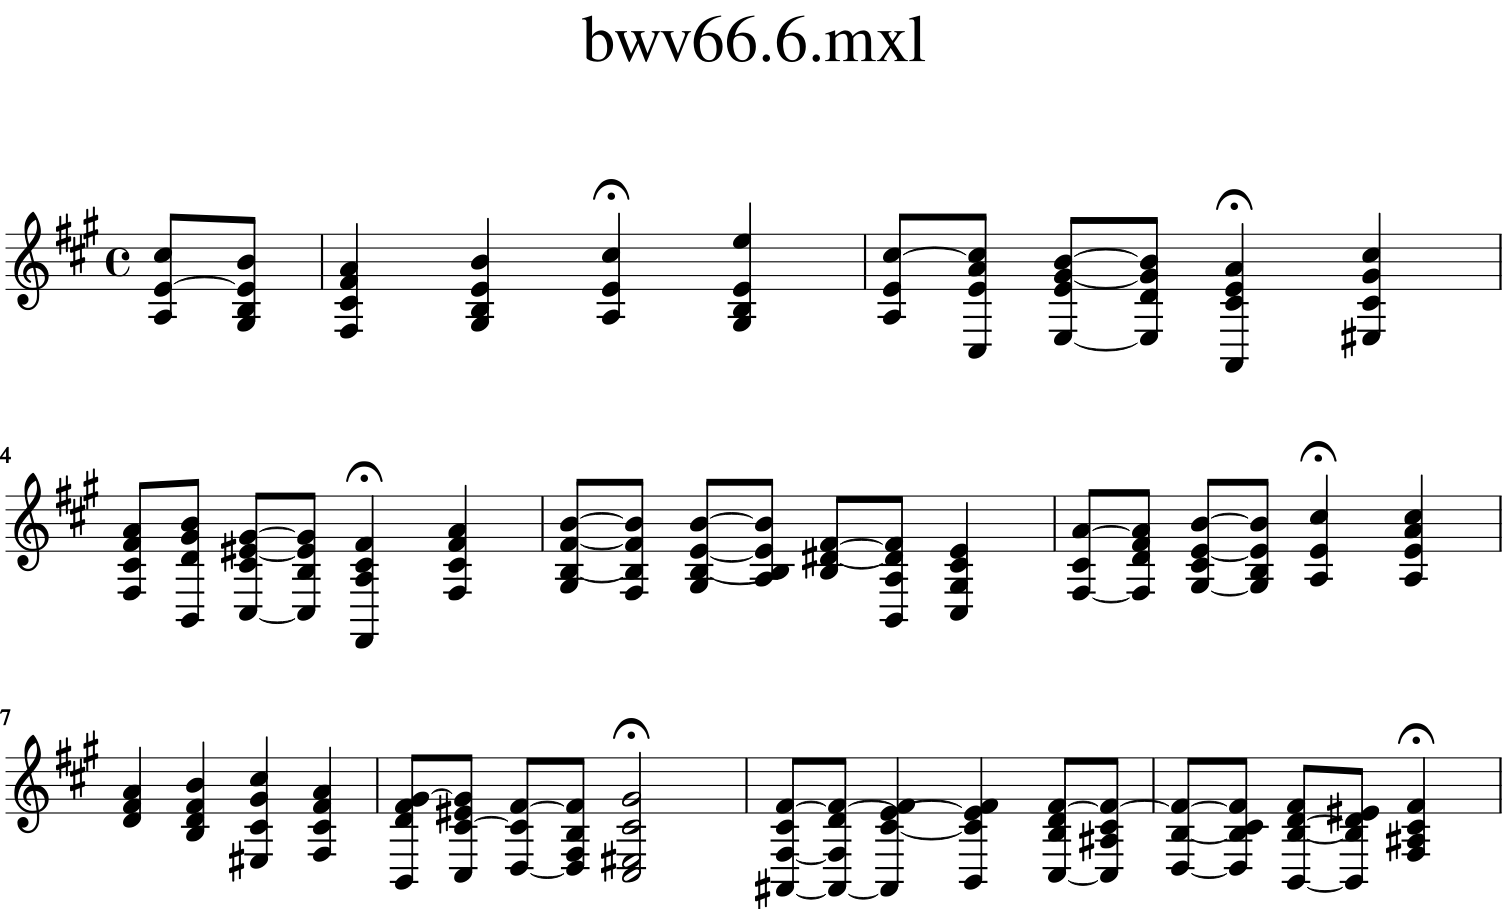

In [6]:
bChords = b.chordify() #use the chorify method to summarize the notes
bChords.show()

TA-DA! Every **note** in the score is now represented in a **single chord** and every moment where some element moves is also represented. Sometimes this process of chordifying is called **“salami slicing,”** that is, cutting the score so thinly that every moment where something happens is fully represented.

Now we can see if there are any (fully-notated) **dominant seventh chords** in the piece. The new chordified part still has measures, so we’ll recurse into the chordified part first to get to the chords. It might also have time signatures, etc., so we will filter them out so we only have chords.

In [7]:
for thisChord in bChords.recurse().getElementsByClass('Chord'): #iterates through chords in bChords
    if thisChord.isDominantSeventh():
        print(thisChord.measureNumber, thisChord.beatStr, thisChord) #prints every DominantSeventh

2 2 1/2 <music21.chord.Chord E3 D4 G#4 B4>
3 2 1/2 <music21.chord.Chord C#3 B3 E#4 G#4>
4 3 1/2 <music21.chord.Chord B2 A3 D#4 F#4>
8 2 <music21.chord.Chord A#2 C#4 E4 F#4>


Sure enough we can check the score above and see that there are four of them: three of them on the offbeat (m.2 beat 2.5, m. 3 beat 2.5, and m. 4 beat 3.5) which are made from passing motion, and one of them in m. 8 beat 2 also in a metrically weak position.

We can see the chordified version by callling “.show()” on bChords itself, but it’s probably better to see it in the **context of the whole score**. Let’s put it in the score at the beginning (all Part objects should go at the beginning) and then show just measures 0 (pickup) to 4:

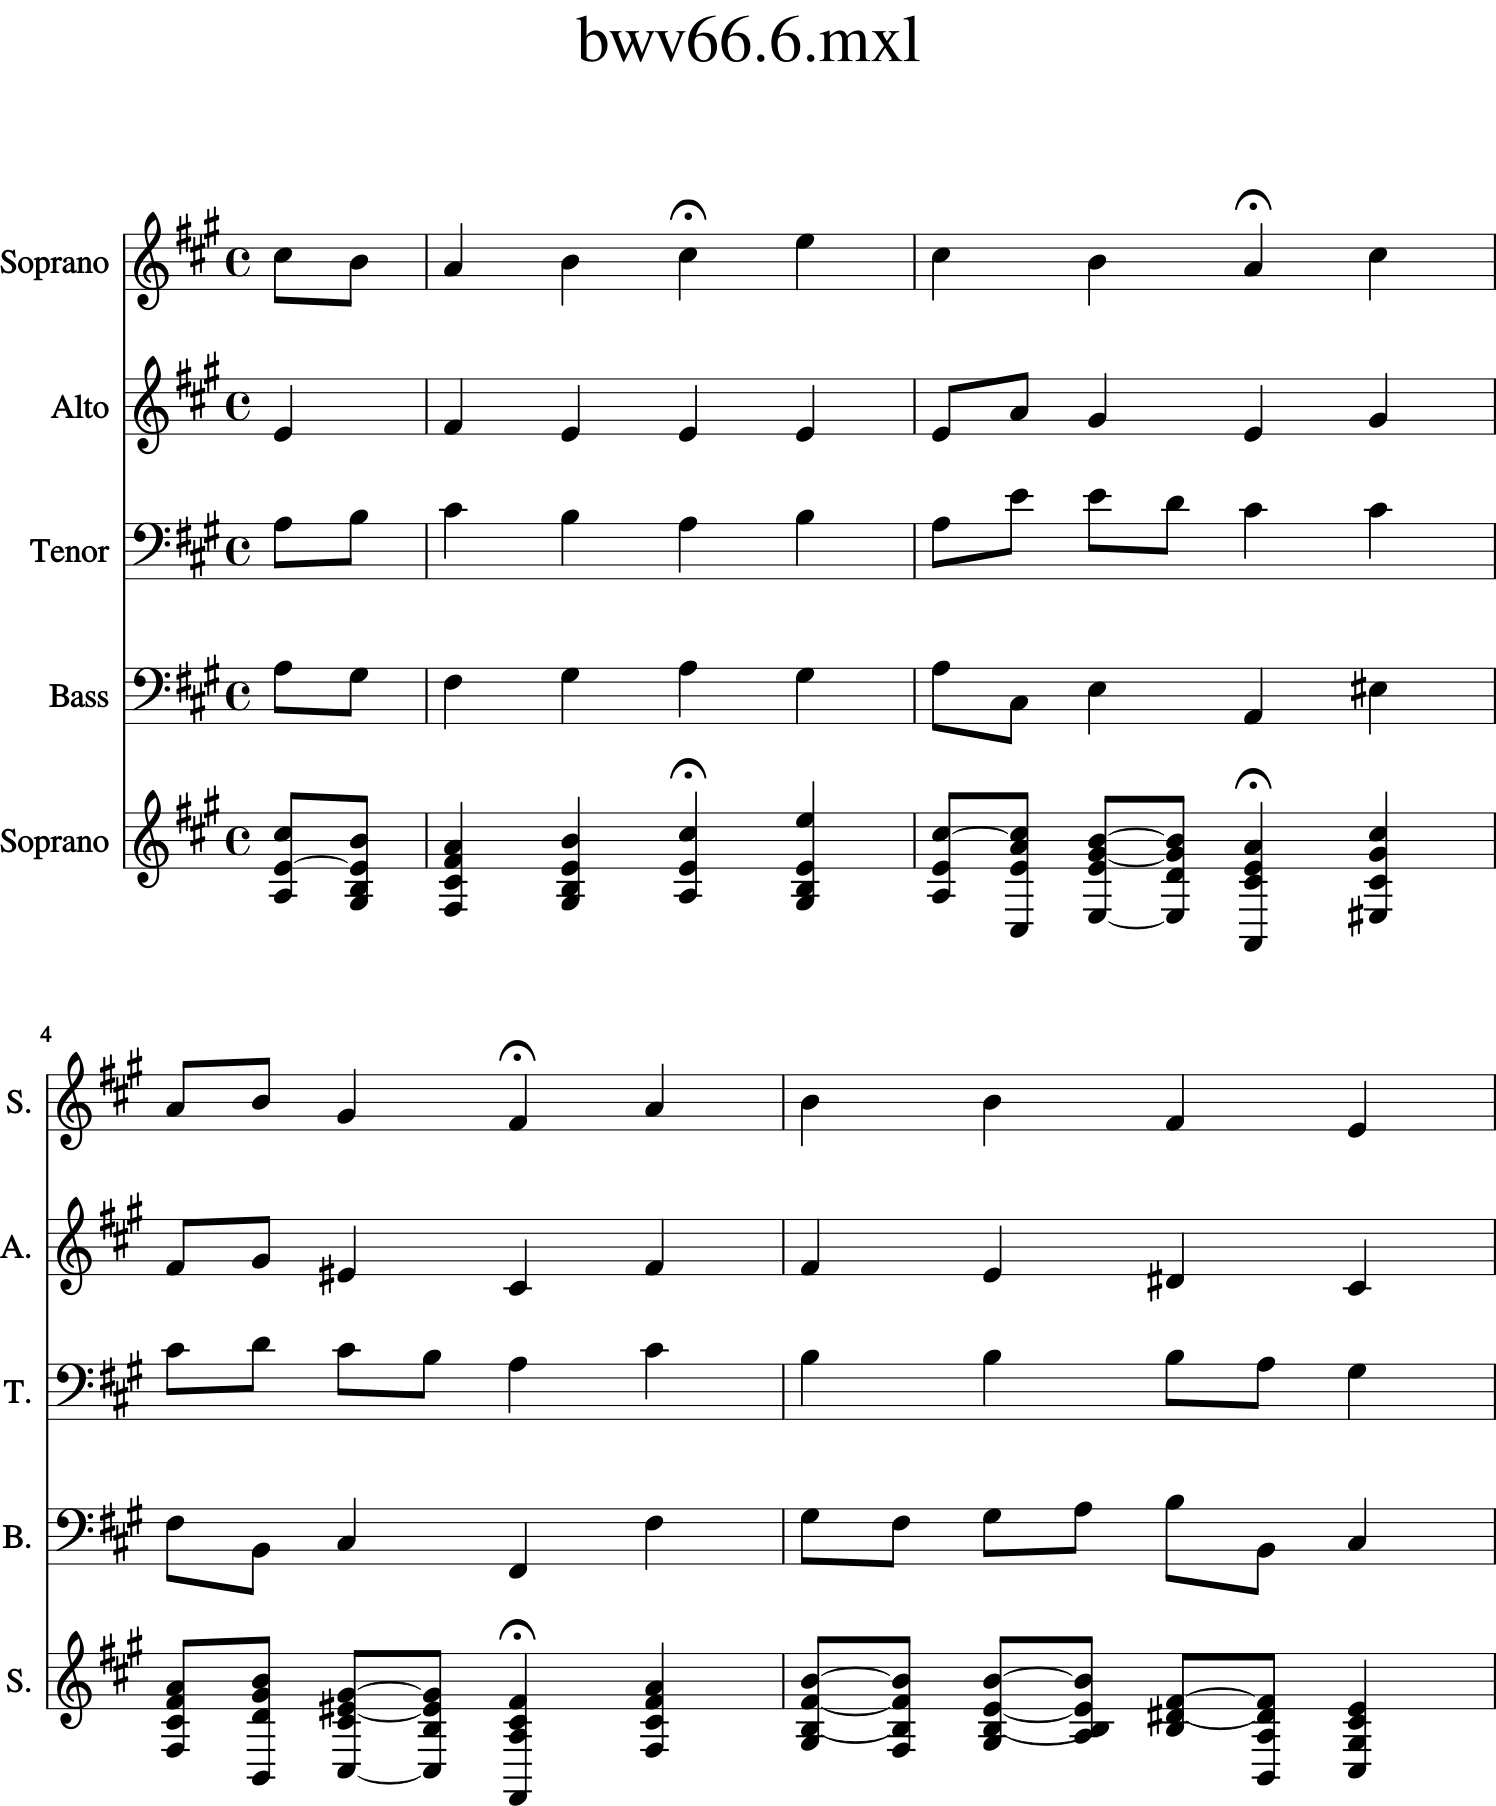

In [8]:
b.insert(0, bChords) #inserts chordified part as a new line to the original piece
b.measures(0, 4).show()

That’s a bit messy to read, so let’s put all these chords in **_closedPosition_** (see User’s Guide, Chapter 7: Chords for more information).

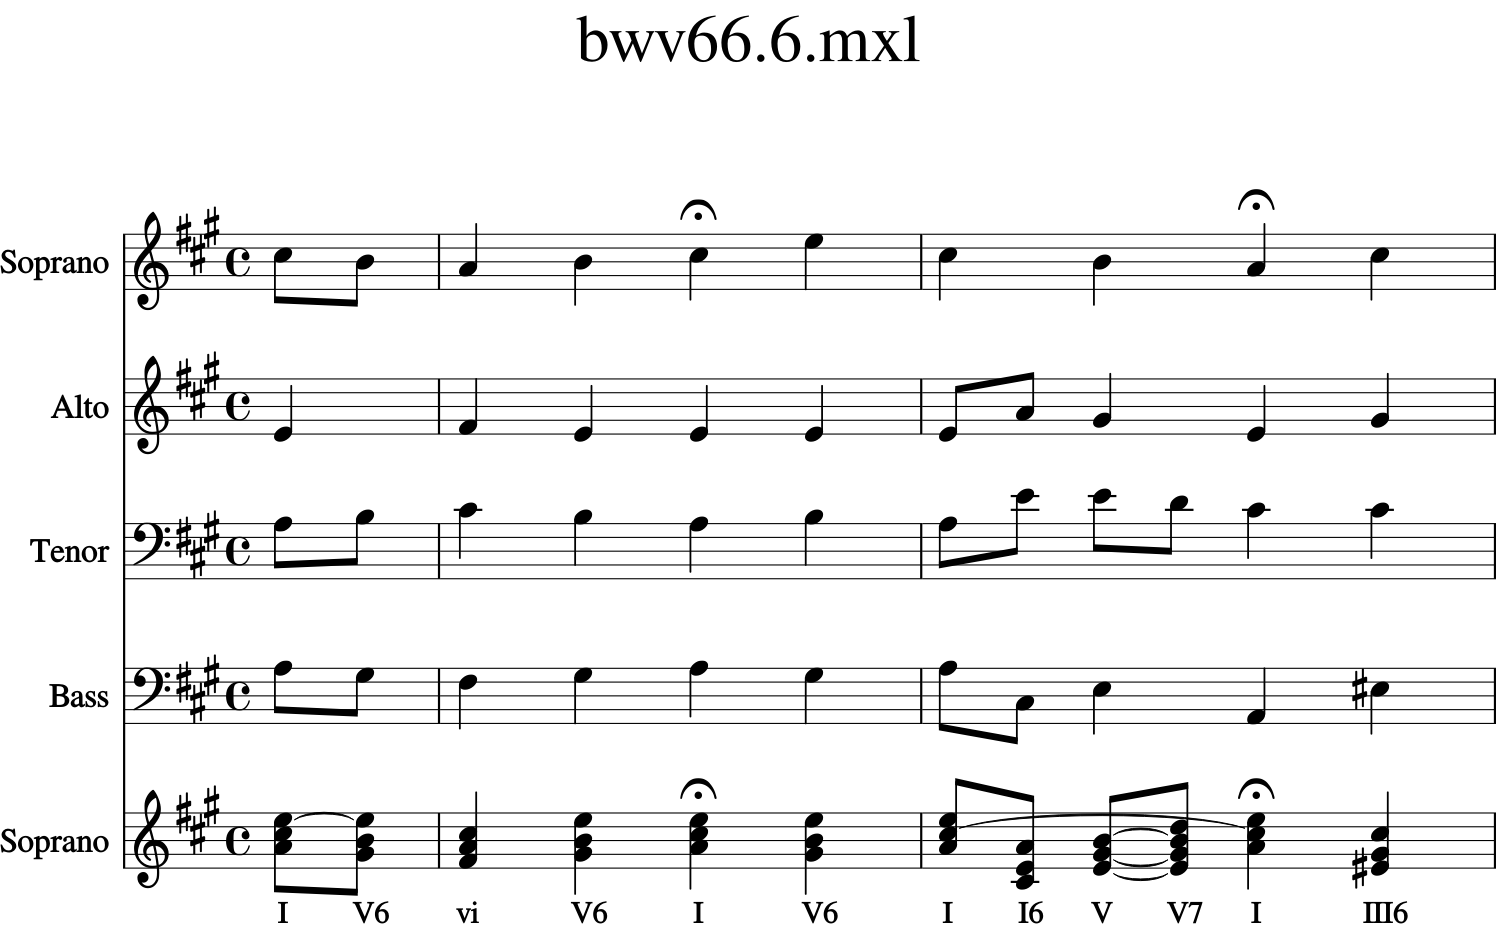

In [14]:
for c in bChords.recurse().getElementsByClass('Chord'): #iterates through the chords in bChords
    c.closedPosition(forceOctave=4, inPlace=True) #puts notes in octave 4 together

b.measures(0, 2).show()

Note that when we move a chord to closed position, unfortunately **it loses its tie information**, since the pitch that starts a tie can’t tell whether or not the next pitch will end up in a different octave (for instance, the Cs in the first two notes of the second full measure). Maybe it’s something we can do someday…

We can use the function **_roman.romanNumeralFromChord_** to label each of the chordified Chords:

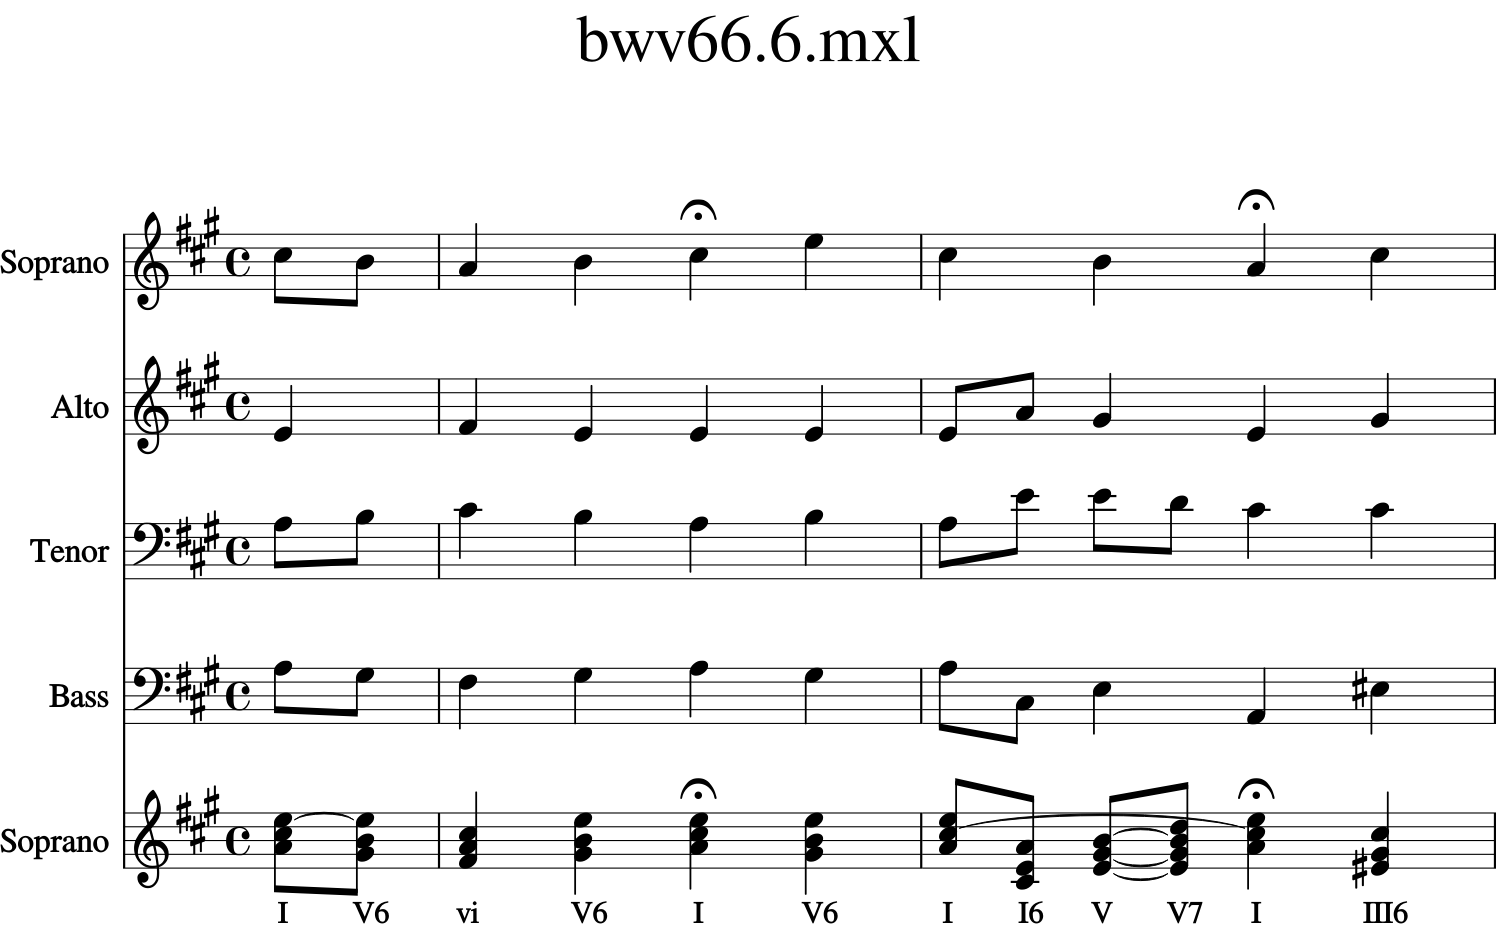

In [10]:
for c in bChords.recurse().getElementsByClass('Chord'): #iterates through the chords in bChords
    rn = roman.romanNumeralFromChord(c, key.Key('A')) #gets number from chord in key a and sets it to rn
    c.addLyric(str(rn.figure)) #adds that number as a lyric

b.measures(0, 2).show()

We can also see everything directly if we look at the _.show('text')_ output:

In [11]:
bChords.measures(0, 2).show('text')

{0.0} <music21.instrument.Instrument P1: Soprano: Instrument 1>
{0.0} <music21.stream.Measure 0 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of f# minor>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord G#4 B4 E5>
{1.0} <music21.stream.Measure 1 offset=1.0>
    {0.0} <music21.chord.Chord F#4 A4 C#5>
    {1.0} <music21.chord.Chord G#4 B4 E5>
    {2.0} <music21.chord.Chord A4 C#5 E5>
    {3.0} <music21.chord.Chord G#4 B4 E5>
{5.0} <music21.stream.Measure 2 offset=5.0>
    {0.0} <music21.chord.Chord A4 C#5 E5>
    {0.5} <music21.chord.Chord C#4 E4 A4>
    {1.0} <music21.chord.Chord E4 G#4 B4>
    {1.5} <music21.chord.Chord E4 G#4 B4 D5>
    {2.0} <music21.chord.Chord A4 C#5 E5>
    {3.0} <music21.chord.Chord E#4 G#4 C#5>


We can also just **extract the lyrics**, where we stored the RomanNumeral information:

In [13]:
for c in bChords.measures(0,2).flat: #flattens the first measures of bChords and iterates through it
    if 'Chord' not in c.classes: #if element not a chord this loop continues to the next chord
        continue
    print(c.lyric, end=' ') #else it prints out the lyric of the chord which is the roman number

I V6 vi V6 I V6 I I6 V V7 I III6 

---